In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import hashlib

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# прочитаем данные
path = 'AB_Test_revenue_only.csv'
ab_df = pd.read_csv(path, sep=';')

In [8]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10000 non-null  int64  
 1   variant_name  10000 non-null  object 
 2   revenue       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [9]:
ab_df.head(3)

,user_id,variant_name,revenue
0,9468,control,8.528105
1,9446,control,5.800314
2,8872,control,6.957476


In [11]:
ab_df['variant_name'].value_counts()

variant_name
variant    5016
control    4984
Name: count, dtype: int64

Сколько уникальных пользователей участвовало в эксперименте всего?

In [12]:
ab_df['user_id'].nunique()

6324

Есть ли в дата сете  пользователи, которые попали в обе группы?


In [13]:
user_group_counts = ab_df.groupby('user_id')['variant_name'].nunique()
users_in_multiple_groups = user_group_counts[user_group_counts > 1]
len(users_in_multiple_groups)

1541

In [21]:
print(len(users_in_multiple_groups)/len(ab_df)*100)

15.409999999999998


In [19]:
len(ab_df)

10000

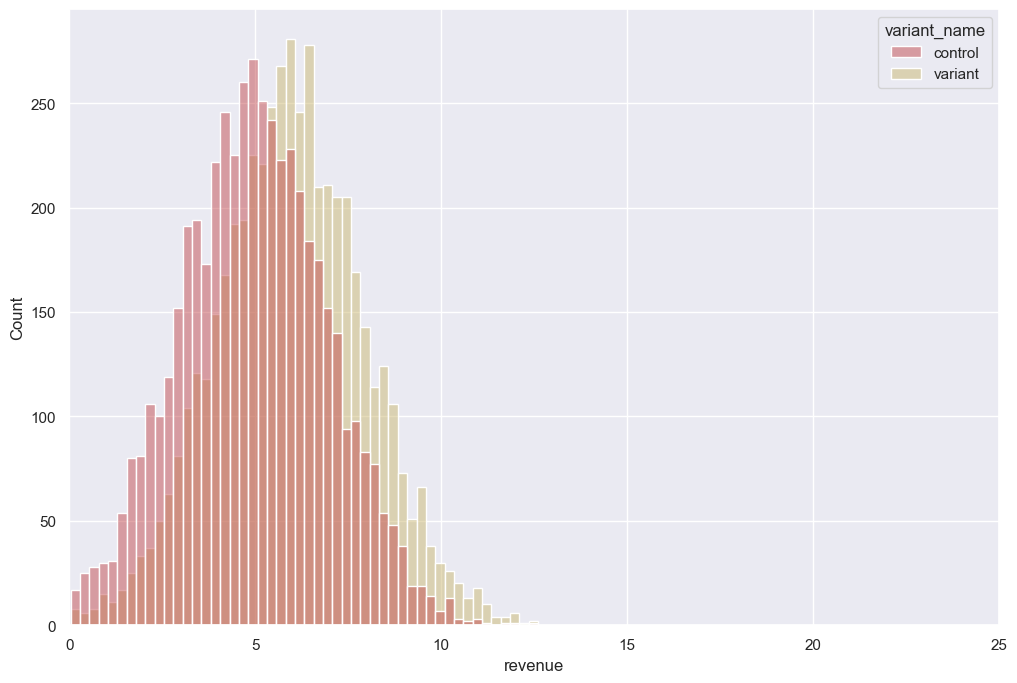

In [14]:
# посмотрим на распределение метрики 
sns.set(rc={'figure.figsize':(12,8)})

groups = sns.histplot(data = ab_df, 
              x='revenue', 
              hue='variant_name', 
              palette = ['r', 'y'],
              alpha=0.5,
              kde=False)
plt.xlim(0, 25)  # настройка лимита для оси х

plt.show()

In [16]:
# статистический тест на наличие различий в тестовых группах

alpha = 0.05
aa_p_value = stats.ttest_ind(ab_df[ab_df.variant_name == "variant"].revenue,
                ab_df[ab_df.variant_name == "control"].revenue,
                equal_var=False).pvalue
print(aa_p_value)
if aa_p_value > alpha:
    print('Группы стат значимо не отличаются. Нельзя отвергнуть нулевую гипотезу.')
else:
    print('Отличие в группах статистически значимо. Отвергаем нулевую гипотезу в пользу альтернативной.')

2.2382644305061823e-133
Отличие в группах статистически значимо. Отвергаем нулевую гипотезу в пользу альтернативной.
